
## 1. Problem Statement
Understanding how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2. Dataset
Dataset used: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

Size: 1000 x 8






## 2.1 Import packages and dataset

In [3]:
!pip install numpy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Using cached pandas-2.2.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.0-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.5 MB/s eta 0:00:0000:0100:01
Us

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [6]:
# import data
df = pd.read_csv('./data/stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

## 2.2 Dataset Information

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())
print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# define numerical and categorical columns
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print("The dataset contains {} numerical features: {}".format(len(numerical_features), numerical_features))
print("\nThe dataset contains {} categorical features: {}".format(len(categorical_features), categorical_features))

The dataset contains 3 numerical features: ['math_score', 'reading_score', 'writing_score']

The dataset contains 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


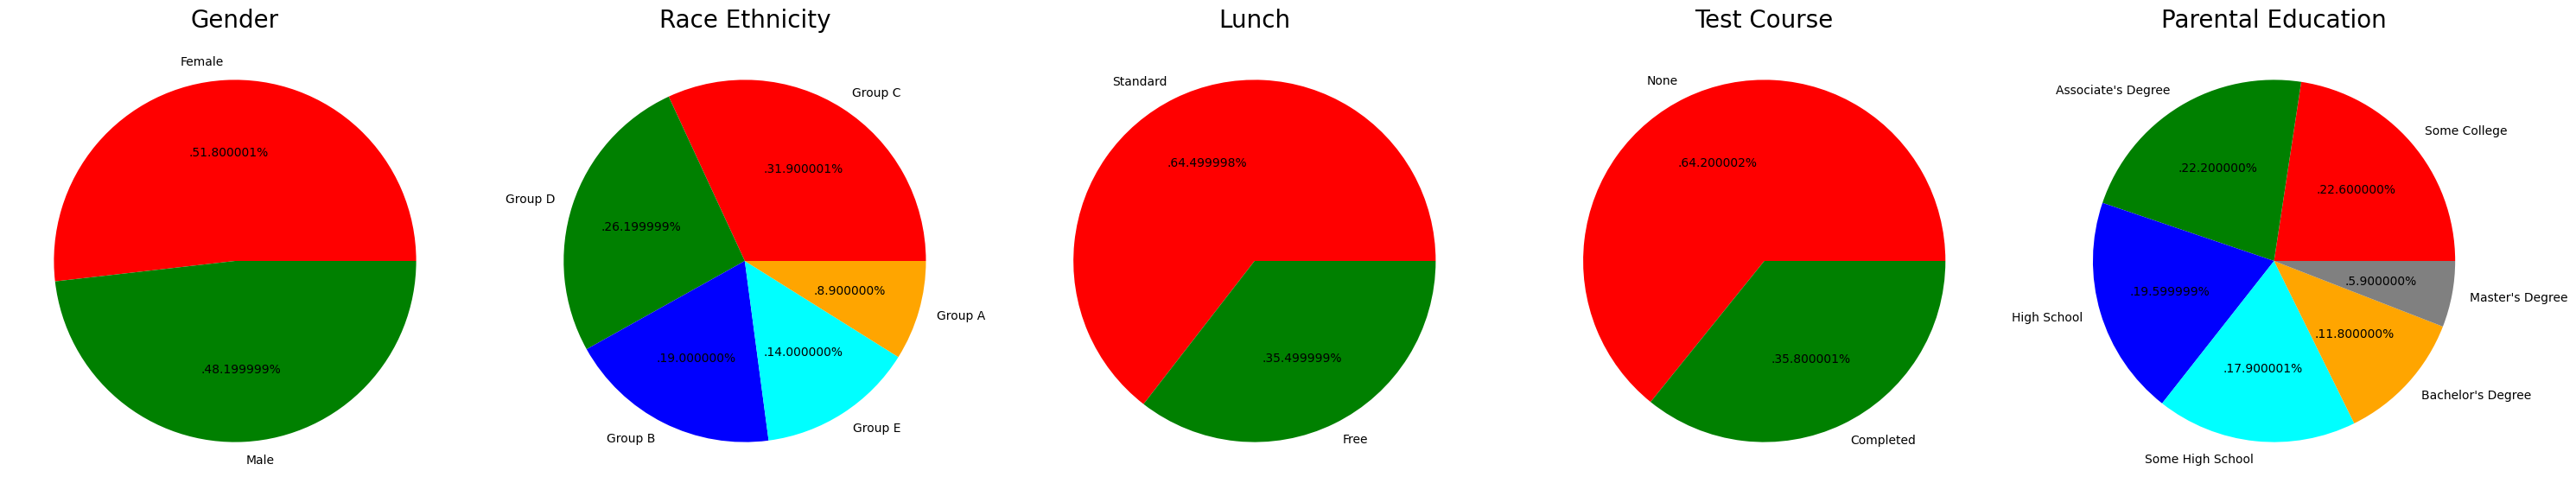

In [16]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## 3. Data Checks:

1. Check Missing Values
2. Check Duplicates
3. Check number of unique values in each column
4. Check the statistics of data set
5. Check perfect and failing scores


## 3.1 Check Missing Values

In [17]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

## 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

No duplicared values in any of the columns of the dataset.

## 3.3 Check number of unique values in each column


In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.4 Check the statistics of data set

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the mean of the math, reading, writing scores, we see that the average student fails each subject.

## 3.5 Check perfect and failing scores

In [22]:
# First add "total" and "average" columns to our df
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total'] / 3

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
# number of students that got perfect score
math_high = df[(df['math_score'] == 100)].shape[0]
reading_high = df[(df['reading_score'] == 100)].shape[0]
writing_high = df[(df['writing_score'] == 100)].shape[0]


In [26]:
print("Students with a perfect score in Math: {}".format(math_high))
print("Students with a perfect score in Reading: {}".format(reading_high))
print("Students with a perfect score in Writing: {}".format(writing_high))

Students with a perfect score in Math: 7
Students with a perfect score in Reading: 17
Students with a perfect score in Writing: 14


In [27]:
# In the United States, a failing grade correpsonds to a D (< 69%), we find the number of students that failed each subject.
math_high = df[(df['math_score'] <= 69)].shape[0]
reading_high = df[(df['reading_score'] <= 69)].shape[0]
writing_high = df[(df['writing_score'] <= 69)].shape[0]

In [28]:
print("Students that failed in Math: {}".format(math_high))
print("Students that failed in Reading: {}".format(reading_high))
print("Students that failed in Writing: {}".format(writing_high))

Students that failed in Math: 591
Students that failed in Reading: 487
Students that failed in Writing: 511


Reflection: students did the worst in Math, and the best in Reading.


## 4. Data Visualization

### 4.1 Explore distribution of average scores to draw necessary conclusions.



### 4.1.1 Histogram and KDE(Kernel Density Estimate)

KDE: Provides a continuous probability density function that represents the overall distribution of the data.

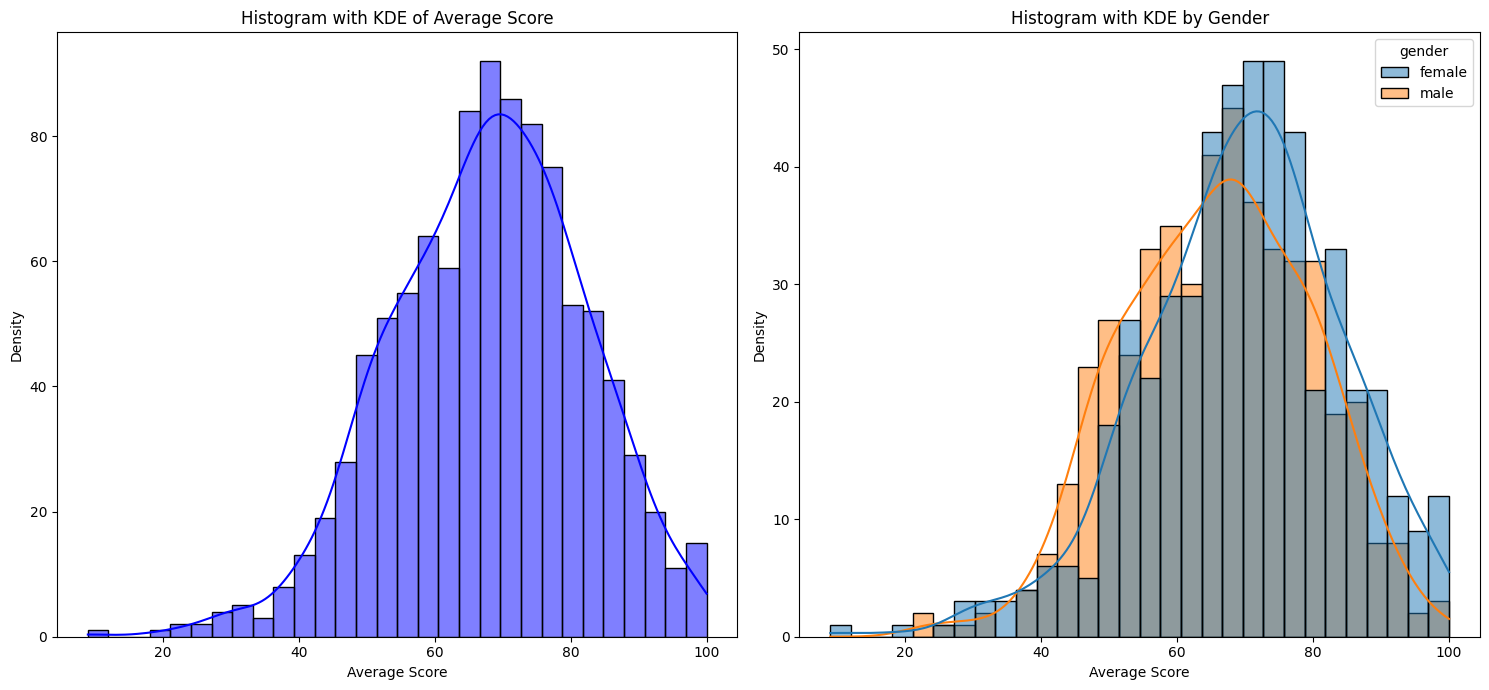

In [29]:
# set up figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# first subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='b', ax=axs[0])
axs[0].set_title("Histogram with KDE of Average Score")
axs[0].set_xlabel("Average Score")
axs[0].set_ylabel("Density")

# second subplot
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram with KDE by Gender")
axs[1].set_xlabel("Average Score")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

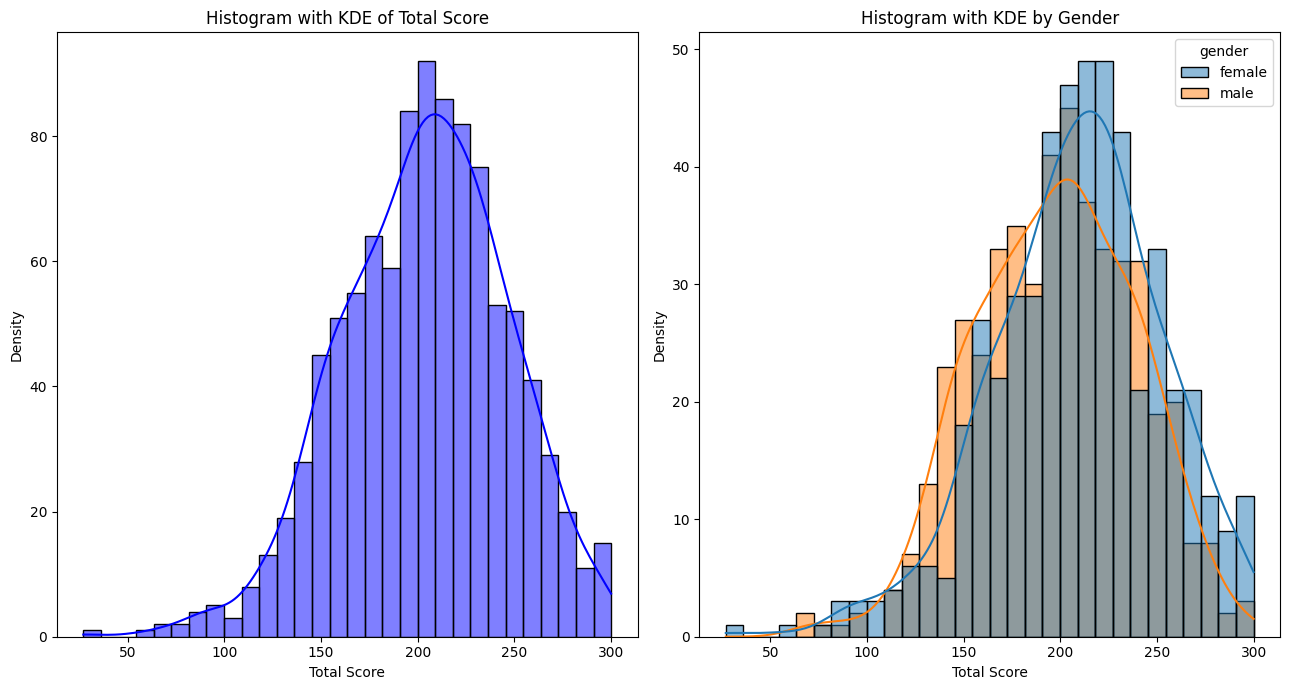

In [30]:
# set up figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# first subplot
sns.histplot(data=df, x='total', bins=30, kde=True, color='b', ax=axs[0])
axs[0].set_title("Histogram with KDE of Total Score")
axs[0].set_xlabel("Total Score")
axs[0].set_ylabel("Density")

# second subplot
sns.histplot(data=df, x='total', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram with KDE by Gender")
axs[1].set_xlabel("Total Score")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

### Insights: Female students generally perform better than male students.

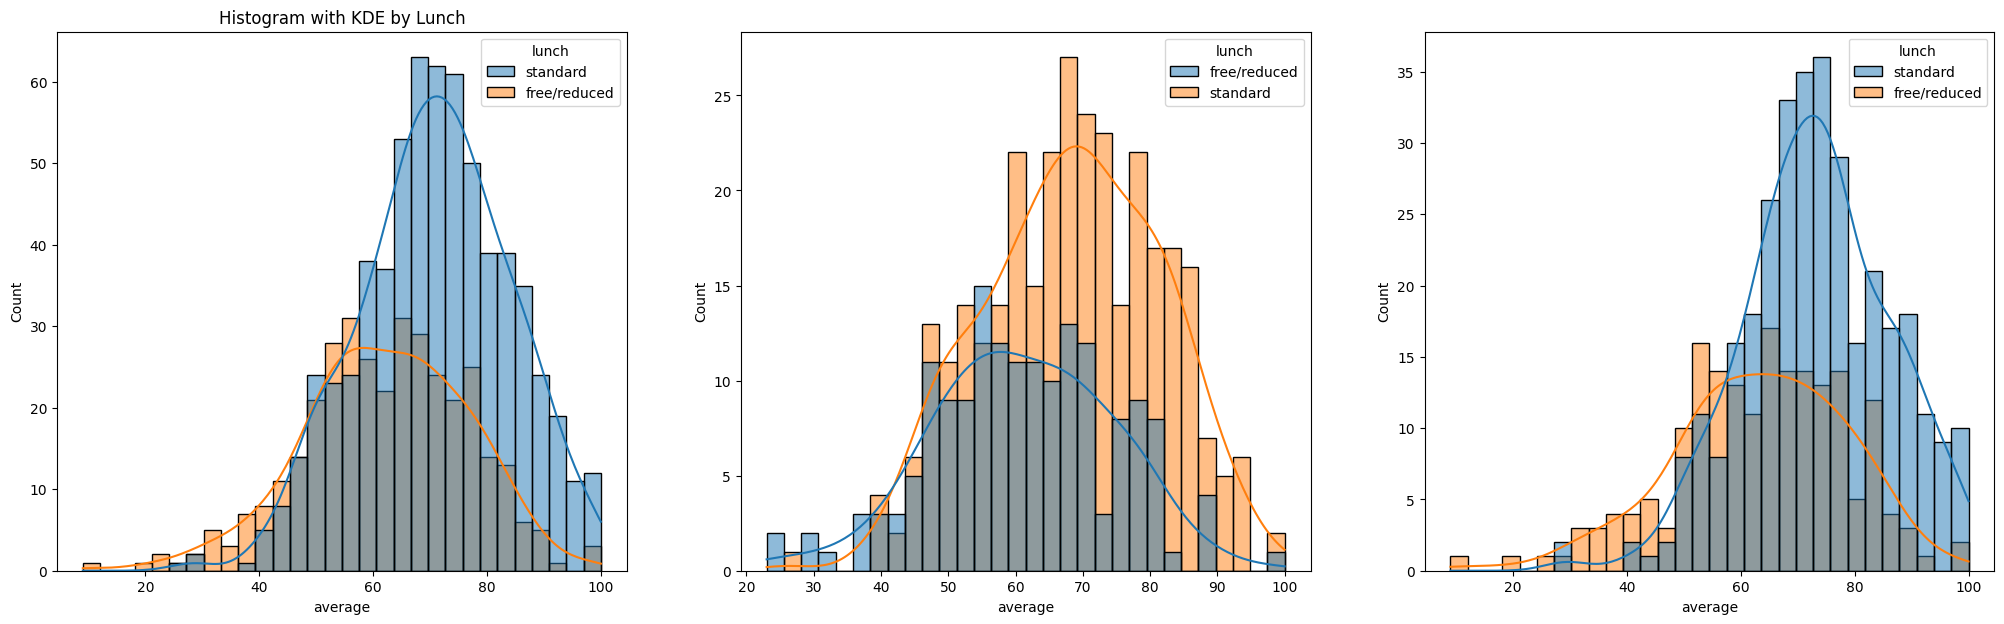

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# subplot 1
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch', ax=axs[0])
axs[0].set_title("Histogram with KDE by Lunch")

# subplot 2
sns.histplot(data=df[df.gender=='male'], x='average', bins=30, kde=True, hue='lunch', ax=axs[1])

# subplot 3
sns.histplot(data=df[df.gender=='female'], x='average', bins=30, kde=True, hue='lunch', ax=axs[2])

plt.show()



### Insights: Having a standard lunch results in a better score for male and female students than having no lunch.

### 4.1.2 Bivariate Analysis

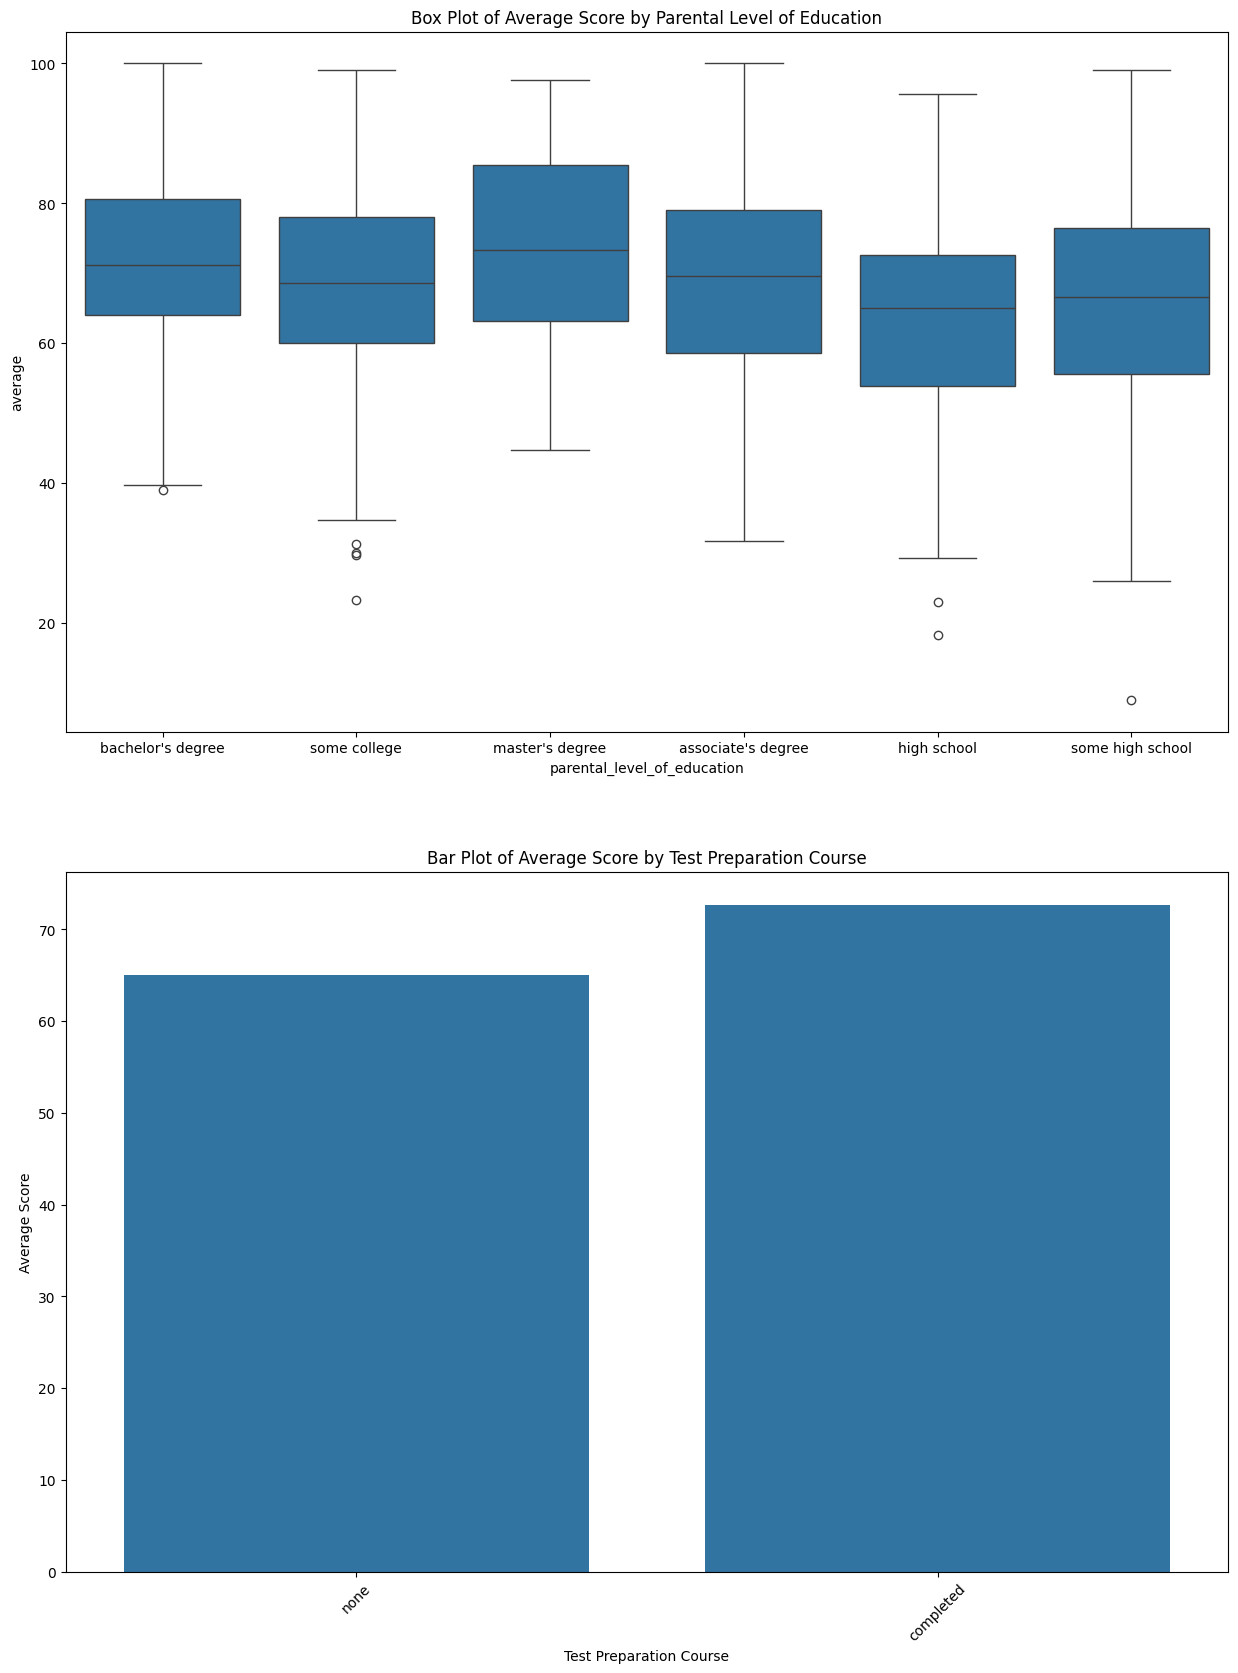

In [33]:
# set up subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 20))

# subplot 1
sns.boxplot(data=df, x='parental_level_of_education', y='average', ax=axs[0])
axs[0].set_title("Box Plot of Average Score by Parental Level of Education")

sns.barplot(data=df, x='test_preparation_course', y='average', estimator=np.mean, ci=None, ax=axs[1])
axs[1].set_title("Bar Plot of Average Score by Test Preparation Course")
axs[1].set_xlabel("Test Preparation Course")
axs[1].set_ylabel("Average Score")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


plt.show()


### Insights:

Level of parental education barely has an effect on student's scores.

Test preparation prior to exams barely made a difference in average scores.

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4.1.3 Race/ethnicity impact on student scores

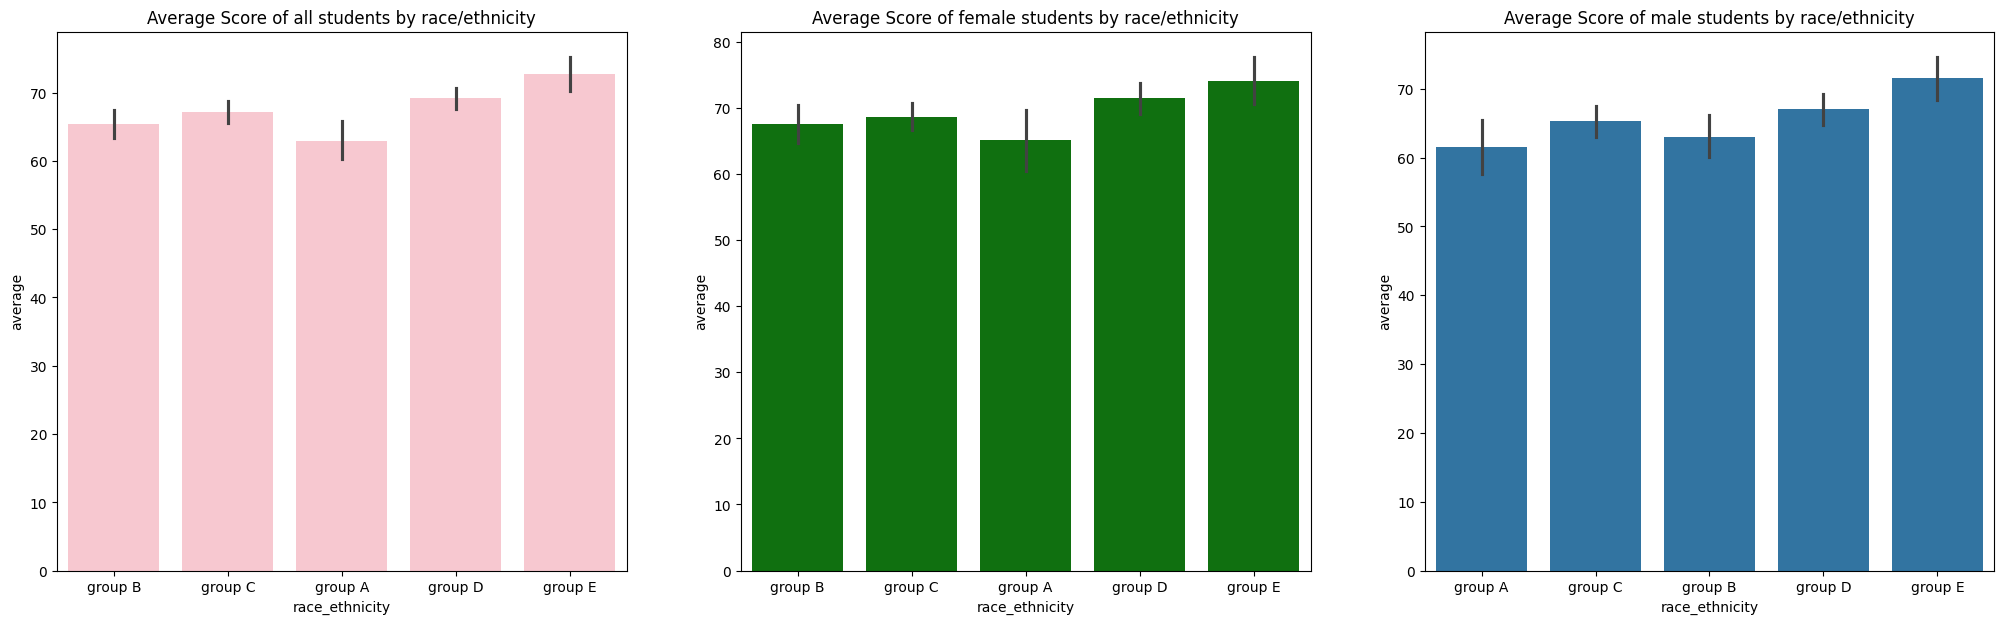

In [36]:
# we want to see if race/ethnicity plays a role in affecting student scores among female and males, together and separately.
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1
sns.barplot(data=df, x='race_ethnicity', y='average', color='pink', ax=axs[0])
axs[0].set_title("Average Score of all students by race/ethnicity")

# 2
sns.barplot(data=df[df.gender=='female'], x='race_ethnicity', y='average', color='green' ,ax=axs[1])
axs[1].set_title("Average Score of female students by race/ethnicity")

# 3
sns.barplot(data=df[df.gender=='male'], x='race_ethnicity', y='average', ax=axs[2])
axs[2].set_title("Average Score of male students by race/ethnicity")

plt.show()

### Insights:

group A and group B on average had the worst scores among all groups, regardless of whether the student is male or female.

### 4.2 Score Analysis in Math, Reading, Writing of All Students

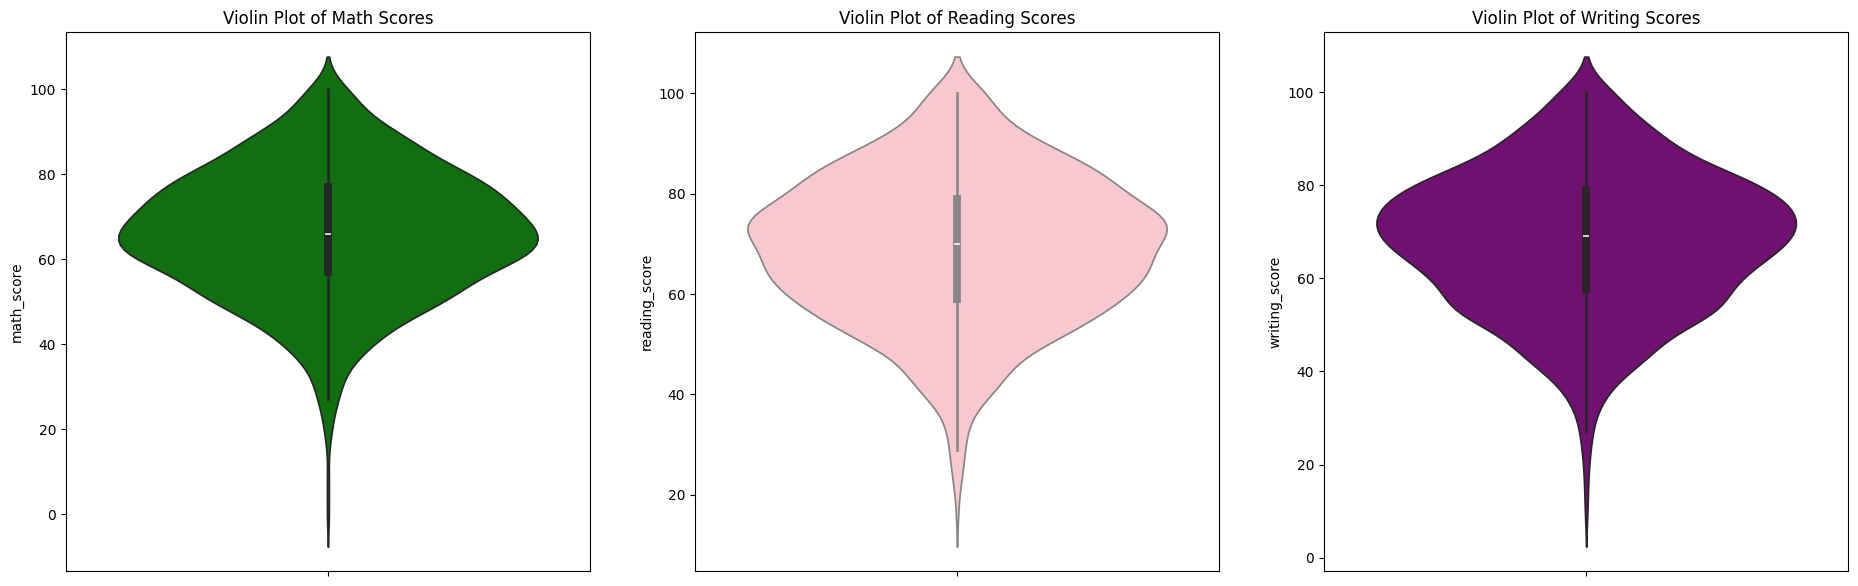

In [38]:
# boxplot
fig, axs = plt.subplots(1, 3, figsize=(23, 7))

# 1
sns.violinplot(data=df, y='math_score', color='green', ax=axs[0])
axs[0].set_title("Violin Plot of Math Scores")

# 2
sns.violinplot(data=df, y='reading_score', color='pink', ax=axs[1])
axs[1].set_title("Violin Plot of Reading Scores")

# 3
sns.violinplot(data=df, y='writing_score', color='purple', ax=axs[2])
axs[2].set_title("Violin Plot of Writing Scores")

plt.show()

### Insights:

A majority of students scored in the range of 60-80 for Math, and in the range of 50-80 for Reading and Writing. The lower average score could be contributed to the fact that not all students in the dataset are native English speakers, whereas Math is a universal lanugage that is understandable by all people.

### 4.3 Let's take the insight one step further and perform bivariate analysis to see if gender plays a role on Math scores.

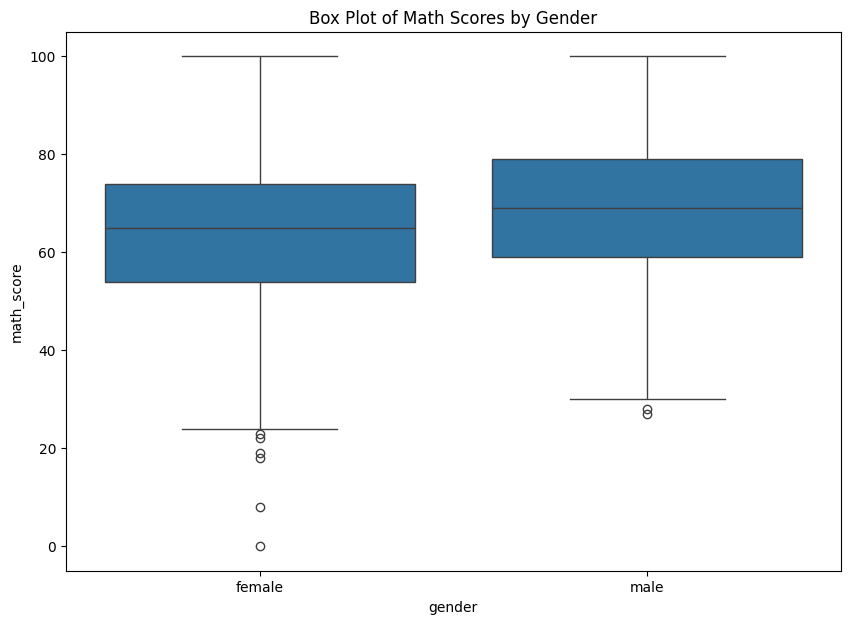

In [39]:

fig, axs = plt.subplots(figsize=(10, 7))

sns.boxplot(data=df, x='gender', y='math_score', ax=axs)
axs.set_title("Box Plot of Math Scores by Gender")

plt.show()

### Insights:

From the boxplot, male students tend to have higher math scores than females.

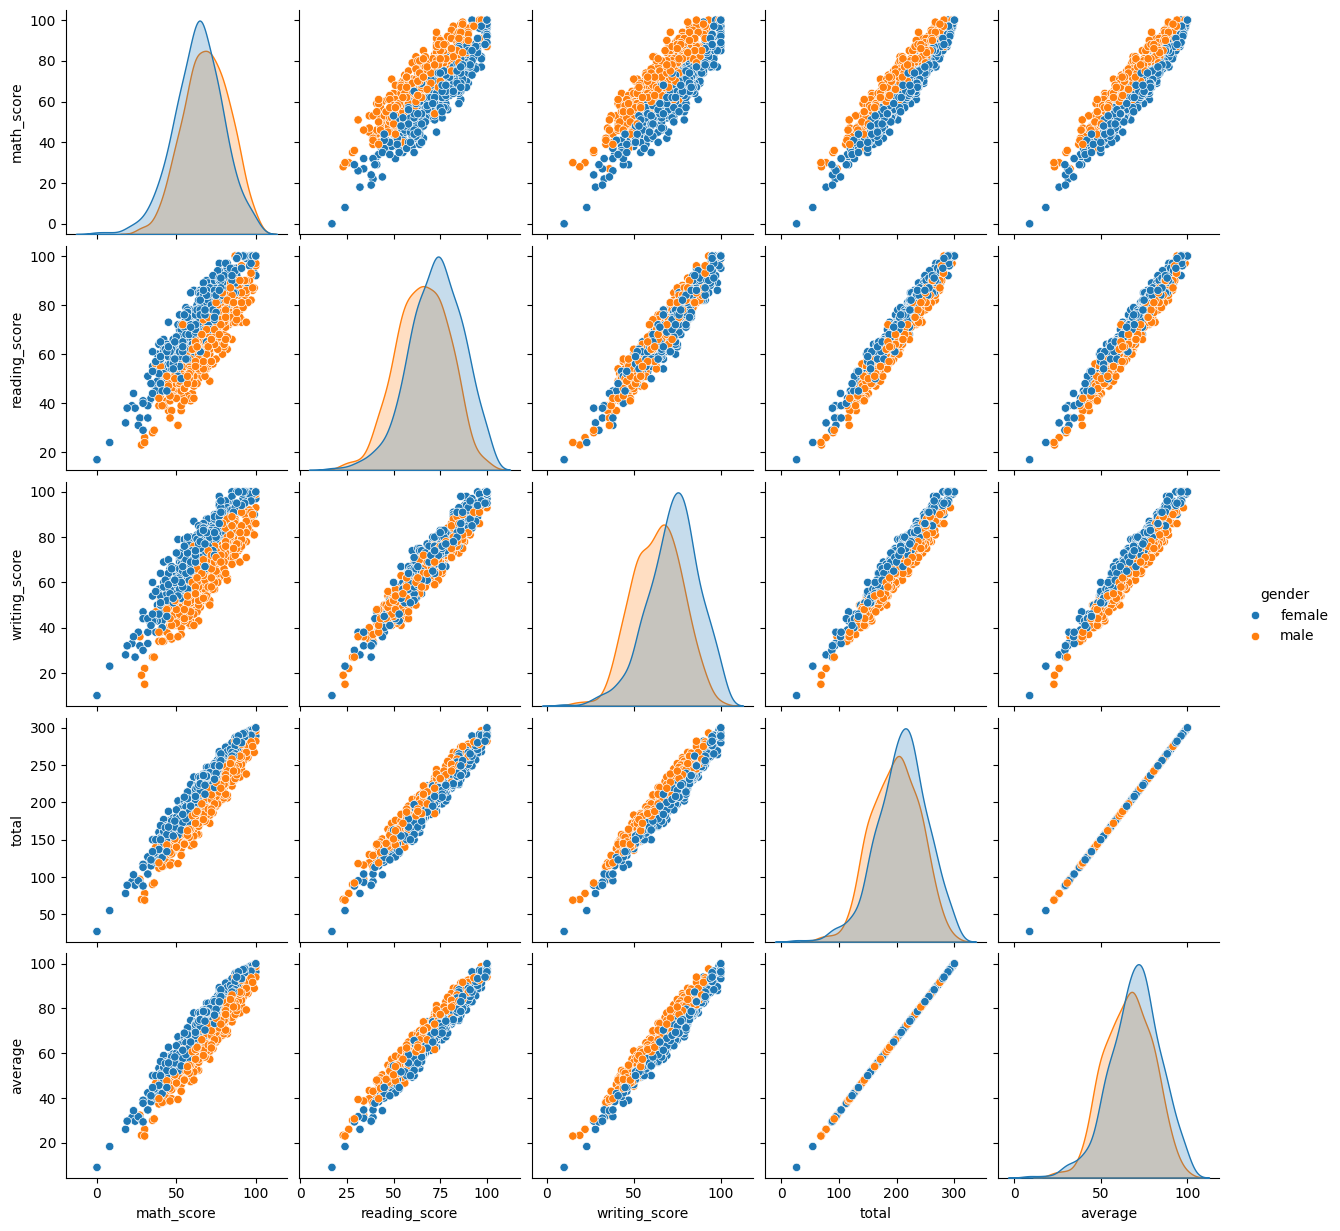

In [40]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights:

For pairplots, all scatterplots are positive sloping, meaning that the x variable and y variable are positvely correlated. This makes sense since a high score in one subject would correlate to a high score in another subject.